In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from autoviz.AutoViz_Class import AutoViz_Class

# from detect_delimiter import detect
# -*- coding: utf-8 -*-

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
df = pd.read_csv("Studer innotec's Data.csv")

In [3]:
df.head()

,Date_Time,Ubat_Vdc_L1,Ubat_Vdc_L2,Ubat_Vdc_L3,Ibat_m_Adc_L1,Ibat_m_Adc_L2,Ibat_m_Adc_L3,Ubat_min_Vdc_L1,Ubat_min_Vdc_L2,Ubat_min_Vdc_L3,...,Pout_a_W_L1,Pout_a_W_L2,Pout_a_W_L3,Minigrid_Vdc,Ein_tot_dkWh,Ein_kWh,Solar Power,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,10.04.2017 00:00,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,...,4.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,10.04.2017 00:01,46.41,46.41,46.44,0.0,0.0,0.0,46.41,46.41,46.41,...,4.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,10.04.2017 00:02,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,...,3.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,10.04.2017 00:03,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,...,4.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,10.04.2017 00:04,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,...,4.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Date_Time               0
Ubat_Vdc_L1             1
Ubat_Vdc_L2             1
Ubat_Vdc_L3             1
Ibat_m_Adc_L1           1
Ibat_m_Adc_L2           1
Ibat_m_Adc_L3           1
Ubat_min_Vdc_L1         1
Ubat_min_Vdc_L2         1
Ubat_min_Vdc_L3         1
Uin_Vac_L1              1
Uin_Vac_L2              1
Uin_Vac_L3              1
Iin_Aac_L1              1
Iin_Aac_L2              1
Iin_Aac_L3              1
Pout_kVA_L1             1
Pout_kVA_L2             1
Pout_kVA_L3             1
Pout_max_kVA_L1         1
Pout_max_kVA_L2         1
Pout_max_kVA_L3         1
Fout_Hz_L1              1
Fout_Hz_L2              1
Fout_Hz_L3              1
Bat_Phase_L1            1
Bat_Phase_L2            1
Bat_Phase_L3            1
Modus_L1                1
Modus_L2                1
Modus_L3                1
Transfert_L1            1
Transfert_L2            1
Transfert_L3            1
RME_L1                  1
RME_L2                  1
RME_L3                  1
Aux1_L1                 1
Aux1_L2     

In [5]:
df.isna().sum()

Date_Time               0
Ubat_Vdc_L1             1
Ubat_Vdc_L2             1
Ubat_Vdc_L3             1
Ibat_m_Adc_L1           1
Ibat_m_Adc_L2           1
Ibat_m_Adc_L3           1
Ubat_min_Vdc_L1         1
Ubat_min_Vdc_L2         1
Ubat_min_Vdc_L3         1
Uin_Vac_L1              1
Uin_Vac_L2              1
Uin_Vac_L3              1
Iin_Aac_L1              1
Iin_Aac_L2              1
Iin_Aac_L3              1
Pout_kVA_L1             1
Pout_kVA_L2             1
Pout_kVA_L3             1
Pout_max_kVA_L1         1
Pout_max_kVA_L2         1
Pout_max_kVA_L3         1
Fout_Hz_L1              1
Fout_Hz_L2              1
Fout_Hz_L3              1
Bat_Phase_L1            1
Bat_Phase_L2            1
Bat_Phase_L3            1
Modus_L1                1
Modus_L2                1
Modus_L3                1
Transfert_L1            1
Transfert_L2            1
Transfert_L3            1
RME_L1                  1
RME_L2                  1
RME_L3                  1
Aux1_L1                 1
Aux1_L2     

In [6]:
df = df.drop(['Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58'], axis = 1)

In [7]:
df.shape

(102238, 56)

Shape of your Data Set: (102238, 59)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  55
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  3
    59 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 1540
Image size of 1080x213984 pixels is too large. It must be less than 2^16 in each direction.
Could not draw Pair Scatter Plots


ValueError: Image size of 1080x213984 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x213984 with 1485 Axes>

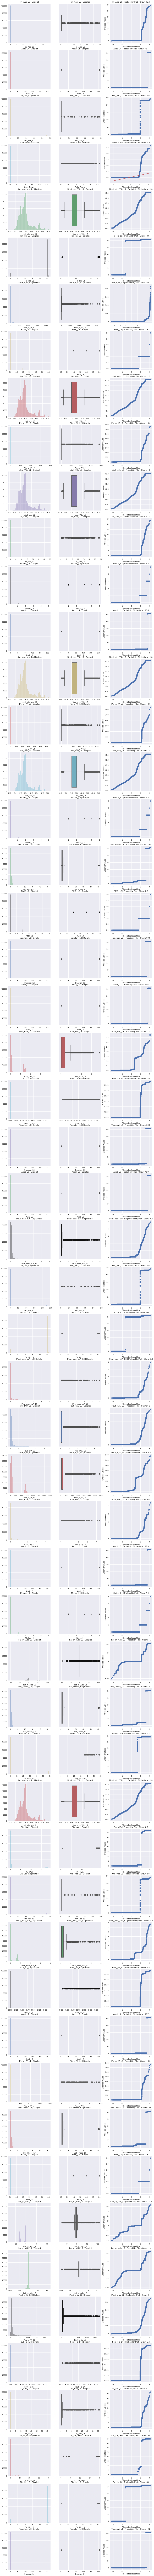

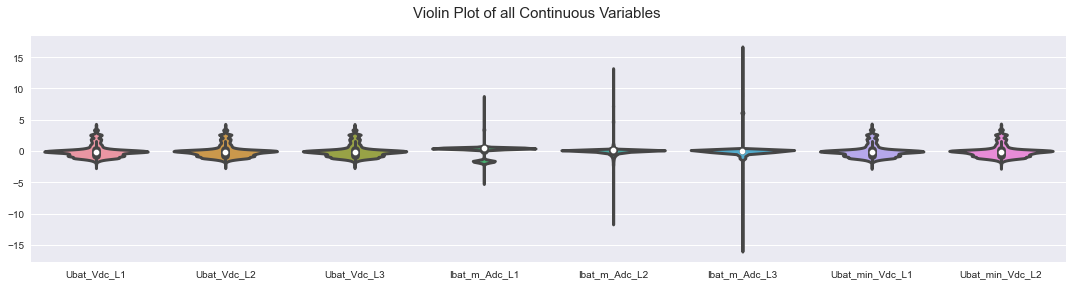

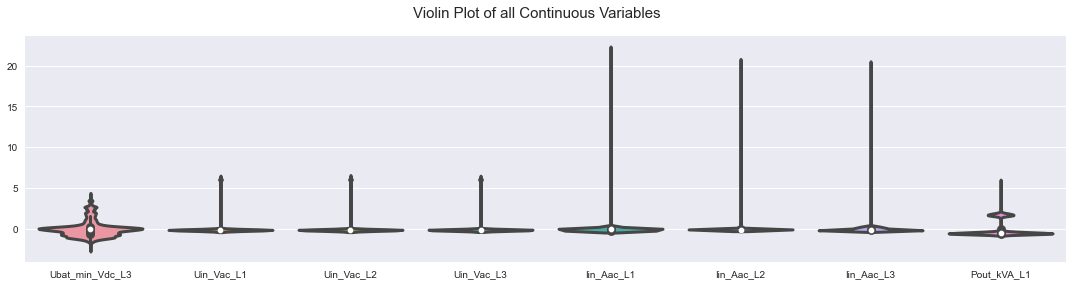

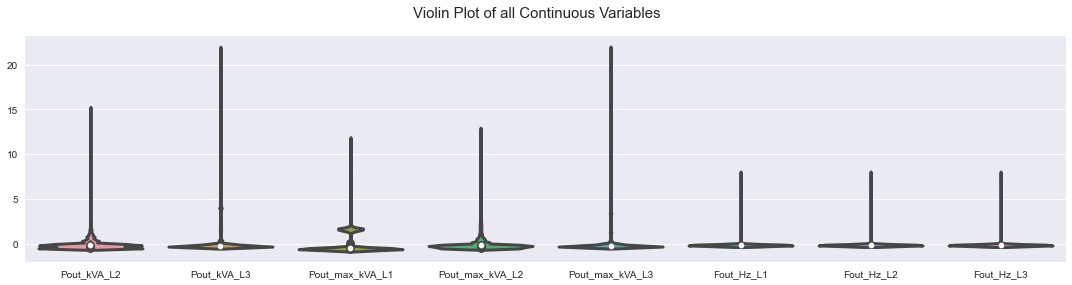

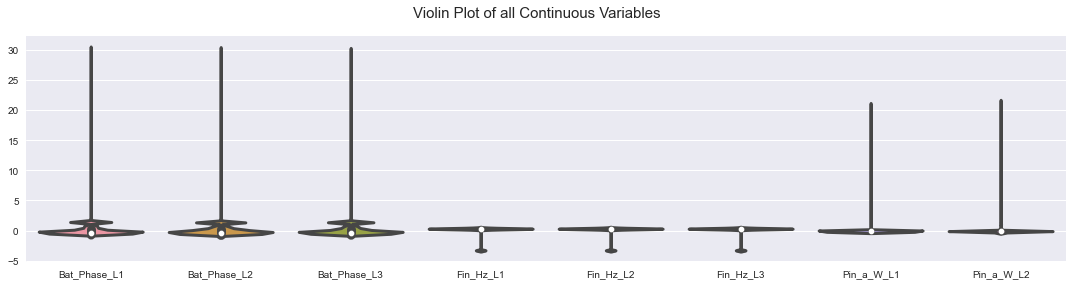

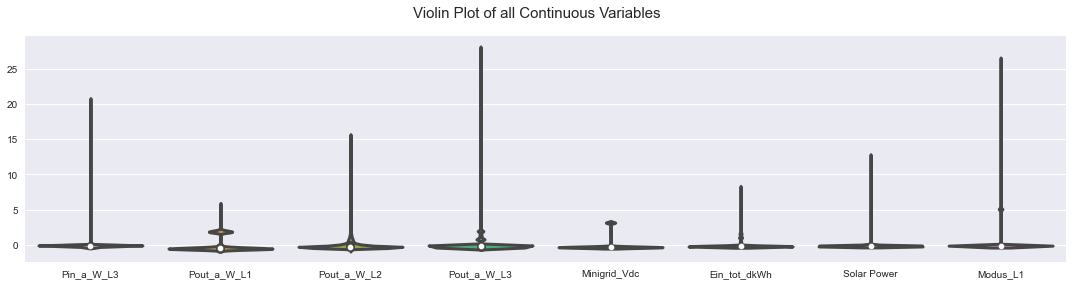

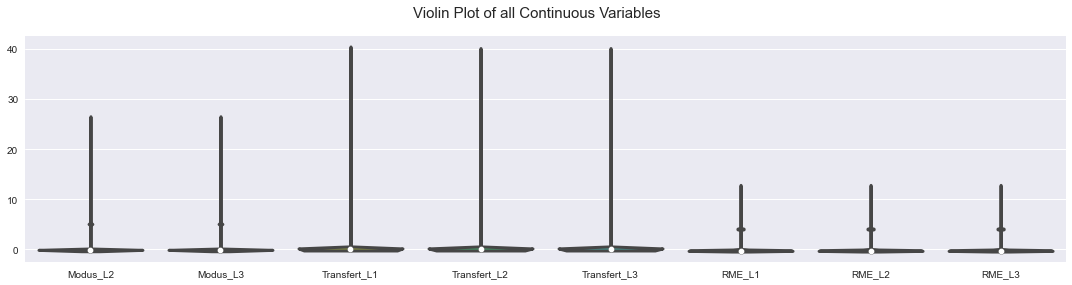

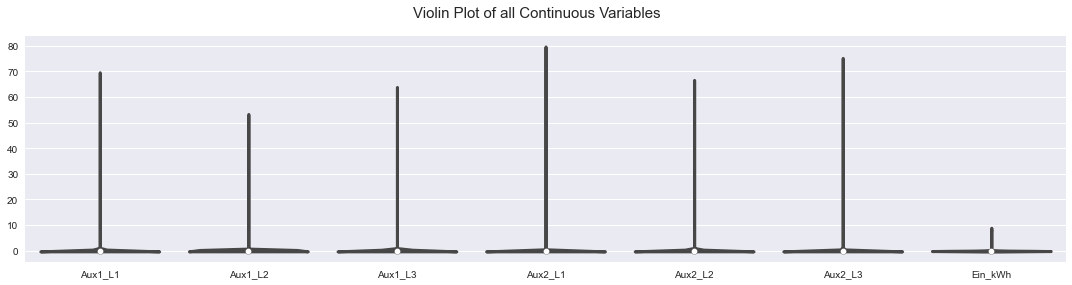

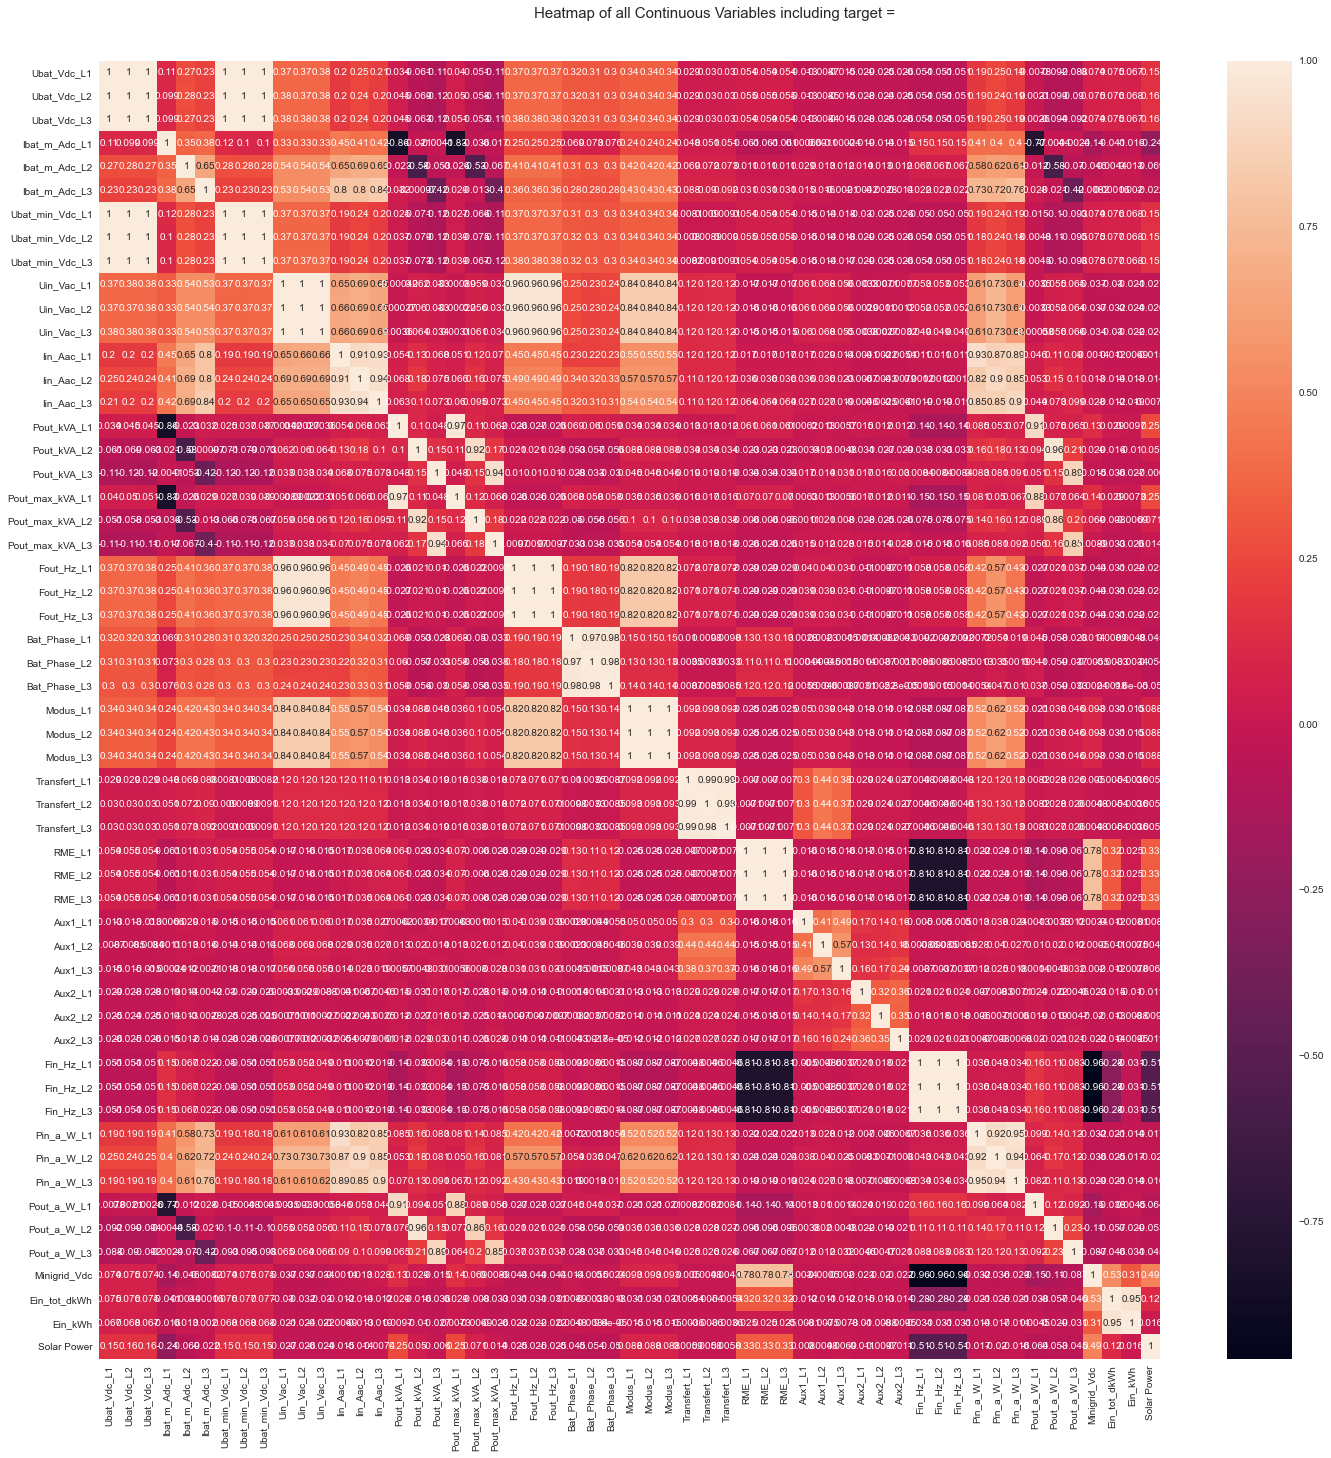

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 240.544

 ###################### VISUALIZATION Completed ########################


,Ubat_Vdc_L1,Ubat_Vdc_L2,Ubat_Vdc_L3,Ibat_m_Adc_L1,Ibat_m_Adc_L2,Ibat_m_Adc_L3,Ubat_min_Vdc_L1,Ubat_min_Vdc_L2,Ubat_min_Vdc_L3,Uin_Vac_L1,...,Pin_a_W_L1,Pin_a_W_L2,Pin_a_W_L3,Pout_a_W_L1,Pout_a_W_L2,Pout_a_W_L3,Minigrid_Vdc,Ein_tot_dkWh,Ein_kWh,Solar Power
0,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,5.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
1,46.41,46.41,46.44,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
2,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0
3,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
4,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,5.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
5,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,5.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
6,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
7,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0
8,46.41,46.41,46.42,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,4.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
9,46.41,46.41,46.41,0.0,0.0,0.0,46.41,46.41,46.41,4.0,...,5.0,5.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0


In [8]:
AV = AutoViz_Class()

AV.AutoViz(
    "Studer Innotec's Data.csv",
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=60
)

In [10]:
X = df.drop(['Date_Time', 'Solar Power'],axis=1)
y = df['Solar Power']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=logreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix